Merging the two data files (u.data and u.items)

In [36]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

In [39]:
movie_data = pd.read_csv('ml-100k/u.data', sep='\t', names=["user_id", "item_id","rating","timestamp"])
movie_titles = pd.read_csv('ml-100k/u.item', sep='\|', header=None, encoding='latin-1')
movie_titles = movie_titles[[0,1]]
movie_titles.columns = ["item_id","title"]
movie_titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [40]:
movie_data = pd.merge(movie_data,movie_titles, on="item_id")
movie_data

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


Filtering the ratings for a particular numb

In [42]:
movie_data.groupby("title").mean()['rating']

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [45]:
movie_data.groupby("title").count()['rating'].sort_values(ascending=False)


title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [46]:
ratings = pd.DataFrame(movie_data.groupby('title').mean()['rating'])

In [50]:
ratings['num of ratings'] = pd.DataFrame(movie_data.groupby('title').count()['rating'])
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


Plotting the figures

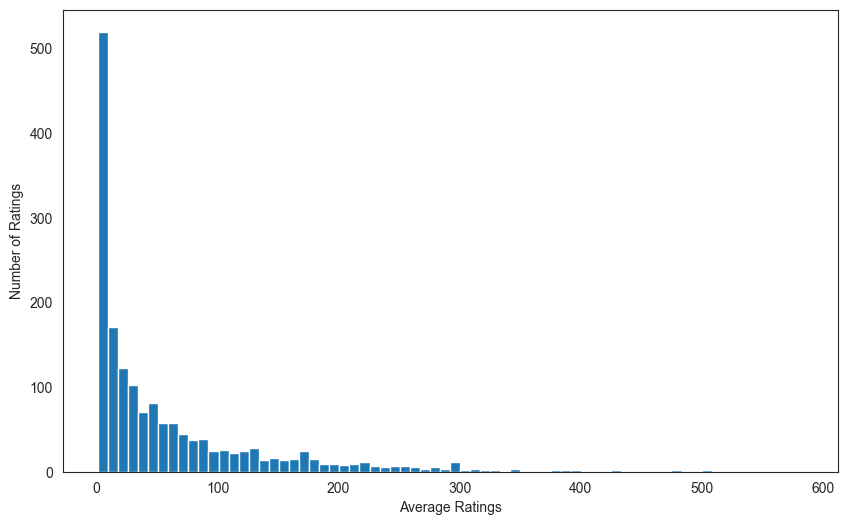

In [57]:
sns.set_style('white')
plt.figure(figsize=(10,6))
plt.hist(ratings['num of ratings'], bins=70)
plt.xlabel("number of ratings")
plt.ylabel("Frequency of Ratings")
plt.show()

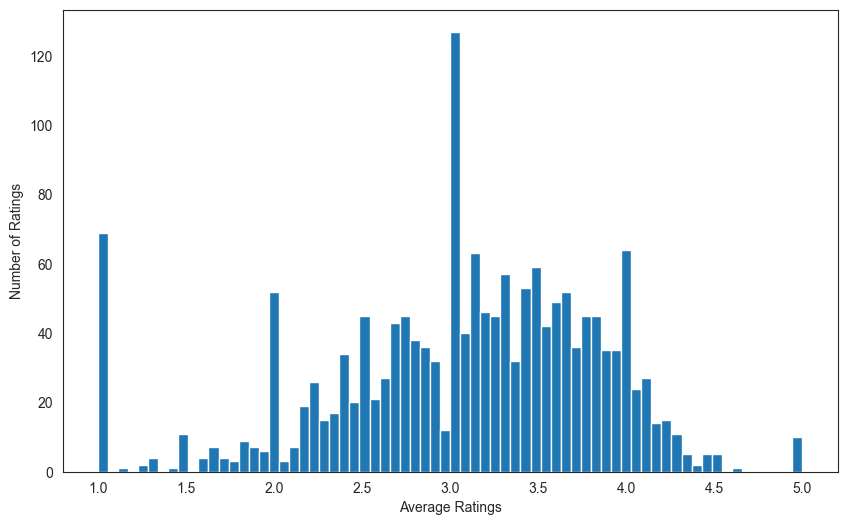

In [55]:
sns.set_style('white')
plt.figure(figsize=(10,6))
plt.hist(ratings['rating'], bins=70)
plt.xlabel("Average Ratings")
plt.ylabel("Number of Ratings")
plt.show()

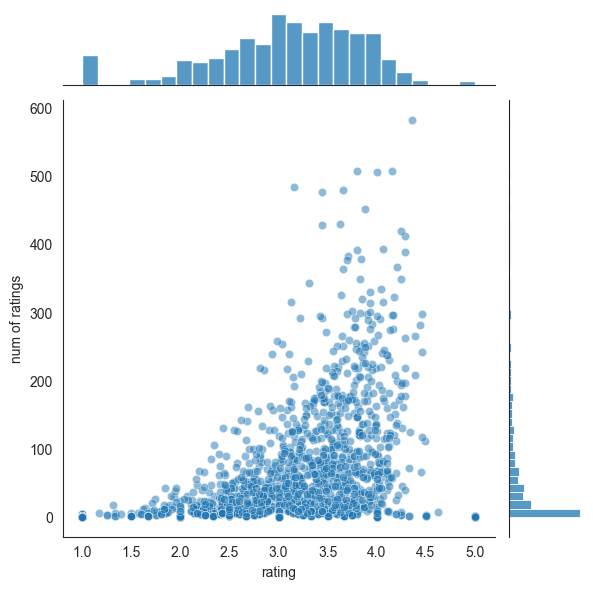

In [56]:
sns.jointplot(x='rating', y='num of ratings', data=ratings, alpha=0.5)

Creating the recommendation system


In [59]:
movie_matix = movie_data.pivot_table(index='user_id', columns='title', values='rating')

In [61]:
starwars_rating = movie_matix['Star Wars (1977)']

Sorting people who rated startwars and what they rated in the other movies to create a rating based recommendation system

In [64]:
similar_to_starwars = movie_matix.corrwith(starwars_rating)
similar_to_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])

In [69]:
#droppping the nan values
similar_to_starwars.dropna(inplace=True)
similar_to_starwars.sort_values(by='Correlation', ascending=False)

#the perfect correlation is faulty because it can be result of very few people rating the second movie,
#so we should set a threshold on this

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [74]:
similar_to_starwars = similar_to_starwars.join(ratings['num of ratings'])

In [79]:
similar_to_starwars[similar_to_starwars['num of ratings'] > 100].sort_values(by='Correlation',ascending=False)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [84]:
def predict_movies(movie_name):
    movie_rating = movie_matix[movie_name]
    similar_to_movie = movie_matix.corrwith(movie_rating)
    similar_to_movie = pd.DataFrame(similar_to_movie, columns=['Correlation'])
    similar_to_movie.dropna(inplace=True)
    similar_to_movie.sort_values(by='Correlation', ascending=False)
    similar_to_movie = similar_to_movie.join(ratings['num of ratings'])
    return similar_to_movie[similar_to_movie['num of ratings'] > 100].sort_values(by='Correlation',ascending=False).head(5)

    

In [87]:
recommendation = predict_movies("Titanic (1997)")
recommendation

,Correlation,num of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
